## Gaussian Process


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from toolz.curried import *
from sklearn.model_selection import train_test_split 

http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record

In [2]:
data = pipe("/Users/matheusfacure/Downloads/Bike-Sharing-Dataset/day.csv", 
            pd.read_csv,
            lambda df: df[["instant", "season", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt"]])

In [3]:
pipe(data,
     lambda df: (df - df.mean()) / df.std(),
     lambda df: df.cov())

,instant,season,workingday,weathersit,temp,hum,windspeed,cnt
instant,1.000000,0.412224,-0.004337,-0.021477,0.150580,0.016375,-0.112620,0.628830
season,0.412224,1.000000,0.012485,0.019211,0.334315,0.205445,-0.229046,0.406100
workingday,-0.004337,0.012485,1.000000,0.061200,0.052660,0.024327,-0.018796,0.061156
weathersit,-0.021477,0.019211,0.061200,1.000000,-0.120602,0.591045,0.039511,-0.297391
temp,0.150580,0.334315,0.052660,-0.120602,1.000000,0.126963,-0.157944,0.627494
hum,0.016375,0.205445,0.024327,0.591045,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.112620,-0.229046,-0.018796,0.039511,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.628830,0.406100,0.061156,-0.297391,0.627494,-0.100659,-0.234545,1.000000


In [4]:
pipe(data,
     lambda df: (df - df.mean()) / df.std(),
     lambda df: df.T.dot(df) / 730)

,instant,season,workingday,weathersit,temp,hum,windspeed,cnt
instant,1.000000,0.412224,-0.004337,-0.021477,0.150580,0.016375,-0.112620,0.628830
season,0.412224,1.000000,0.012485,0.019211,0.334315,0.205445,-0.229046,0.406100
workingday,-0.004337,0.012485,1.000000,0.061200,0.052660,0.024327,-0.018796,0.061156
weathersit,-0.021477,0.019211,0.061200,1.000000,-0.120602,0.591045,0.039511,-0.297391
temp,0.150580,0.334315,0.052660,-0.120602,1.000000,0.126963,-0.157944,0.627494
hum,0.016375,0.205445,0.024327,0.591045,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.112620,-0.229046,-0.018796,0.039511,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.628830,0.406100,0.061156,-0.297391,0.627494,-0.100659,-0.234545,1.000000


In [5]:
from toolz.curried import *
pipe(data.T,
     lambda df: (df - df.mean()) / df.std(),
     lambda df: df.cov())

,0,1,2,3,4,5,6,7,8,9,...,721,722,723,724,725,726,727,728,729,730
0,1.000000,0.999999,0.999998,0.999997,0.999996,0.999994,0.999992,0.999973,0.999950,0.999976,...,0.917450,0.920499,0.751909,0.785321,0.424739,0.941683,0.972302,0.864017,0.919811,0.964174
1,0.999999,1.000000,0.999998,0.999998,0.999997,0.999997,0.999996,0.999982,0.999962,0.999983,...,0.917967,0.921007,0.752767,0.786127,0.425919,0.942120,0.972605,0.864672,0.920321,0.964518
2,0.999998,0.999998,1.000000,1.000000,1.000000,0.999999,0.999997,0.999982,0.999963,0.999986,...,0.918024,0.921063,0.752860,0.786213,0.426044,0.942168,0.972639,0.864743,0.920378,0.964557
3,0.999997,0.999998,1.000000,1.000000,1.000000,0.999999,0.999998,0.999984,0.999966,0.999988,...,0.918179,0.921215,0.753117,0.786455,0.426398,0.942299,0.972730,0.864939,0.920531,0.964660
4,0.999996,0.999997,1.000000,1.000000,1.000000,1.000000,0.999999,0.999987,0.999971,0.999991,...,0.918409,0.921441,0.753498,0.786813,0.426921,0.942493,0.972864,0.865230,0.920757,0.964813
5,0.999994,0.999997,0.999999,0.999999,1.000000,1.000000,0.999999,0.999990,0.999975,0.999993,...,0.918650,0.921678,0.753900,0.787190,0.427474,0.942697,0.973006,0.865536,0.920995,0.964973
6,0.999992,0.999996,0.999997,0.999998,0.999999,0.999999,1.000000,0.999993,0.999980,0.999995,...,0.918947,0.921969,0.754395,0.787654,0.428156,0.942948,0.973179,0.865913,0.921288,0.965170
7,0.999973,0.999982,0.999982,0.999984,0.999987,0.999990,0.999993,1.000000,0.999996,0.999999,...,0.920331,0.923329,0.756704,0.789822,0.431341,0.944115,0.973983,0.867671,0.922653,0.966086
8,0.999950,0.999962,0.999963,0.999966,0.999971,0.999975,0.999980,0.999996,1.000000,0.999994,...,0.921378,0.924355,0.758454,0.791463,0.433756,0.944996,0.974588,0.869001,0.923684,0.966775
9,0.999976,0.999983,0.999986,0.999988,0.999991,0.999993,0.999995,0.999999,0.999994,1.000000,...,0.920110,0.923112,0.756334,0.789474,0.430827,0.943929,0.973855,0.867389,0.922435,0.965940


In [6]:
data = pipe("/Users/matheusfacure/Downloads/Bike-Sharing-Dataset/day.csv",
             pd.read_csv, 
             lambda df: df[["instant", "season", "workingday", "weathersit", "temp", "hum", "windspeed", "cnt"]],
             lambda df: (df - df.mean()) / df.std())

In [7]:
# Kernel
def kernel(A, B, l=0.1, sigma=0.1):
    sqdist = np.sum(A**2,1).reshape(-1,1) + np.sum(B**2,1) - 2*np.dot(A, B.T)
    return np.exp(-.5 * (1/l) * sqdist) + sigma * np.kron(A,B.T)

# Prior

In [8]:
np.random.seed(42)
plot_xs = np.reshape(np.linspace(-5, 5, 300), (300,1))
K_xx = kernel(plot_xs, plot_xs, l=1, sigma=1)
f_prior = np.random.multivariate_normal(np.ones(len(plot_xs)), K_xx, size=10).T

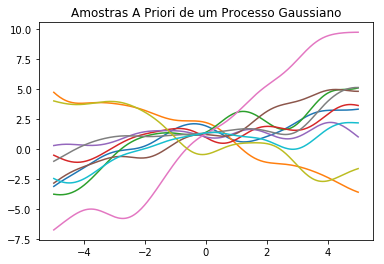

In [9]:
plt.plot(plot_xs, f_prior)
plt.title('Amostras A Priori de um Processo Gaussiano')
plt.show()

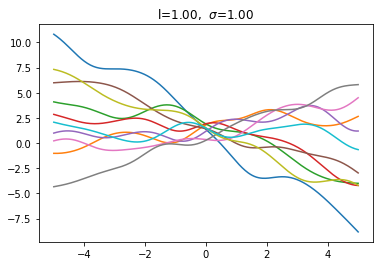

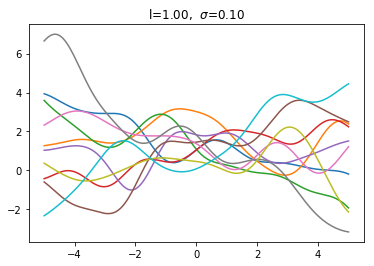

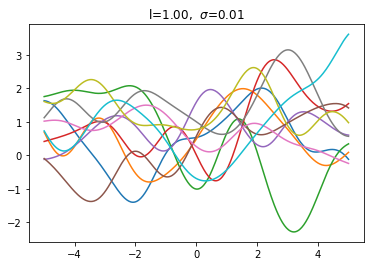

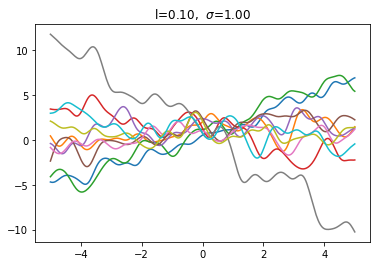

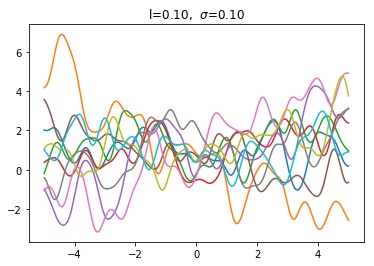

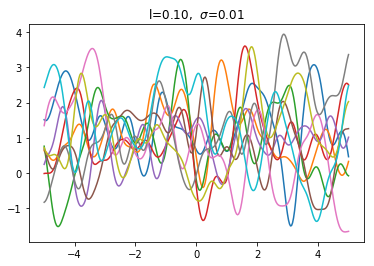

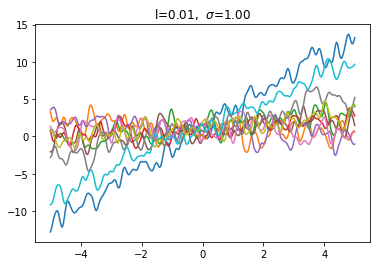

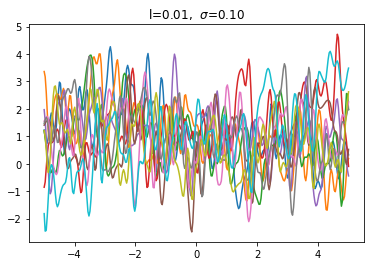

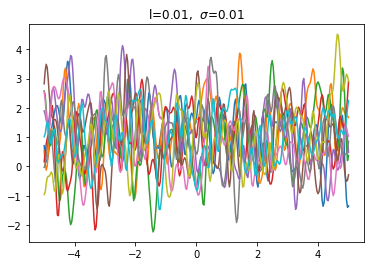

In [10]:
def plot_sample_prior(l, sigma):
    K_xx = kernel(plot_xs, plot_xs, l=l, sigma=sigma)
    f_prior = np.random.multivariate_normal(np.ones(len(plot_xs)), K_xx, size=10).T
    plt.plot(plot_xs, f_prior)
    plt.title('l=%.2f,  $\sigma$=%.2f' % (l, sigma))
    plt.show()

params = [1, 0.1, 0.01]

for i in params:
    for j in params:
        plot_sample_prior(i, j)

# Posterior

In [11]:
data_train, data_test, _, _ = train_test_split(data, data, test_size=.5)
def get_set(df, data_frac, features):
    return pipe(df,
                lambda df: df.sample(frac=data_frac),
                lambda df: df.sort_values(by="instant"),
                lambda df: (df[features].values, df[["cnt"]].values))

np.random.seed(42)
X_train, y_train = get_set(data_train, 0.02, ["instant"])
X_test, y_test = get_set(data_test, 0.02, ["instant"])

In [12]:
l = 0.5
sigma_y = 0.01
X_test = np.linspace(-4, 4, 50).reshape(50, 1)
K_ss = kernel(X_test, X_test, l, sigma_y)
K_xx = kernel(X_train, X_train, l, sigma_y)
K_sx = kernel(X_train, X_test, l, sigma_y)

In [13]:
L = np.linalg.cholesky(K_xx + sigma_y*np.eye(len(X_train)))
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))
mu = K_sx.T.dot(alpha).squeeze()

v = np.linalg.solve(L, K_sx)
cov = K_ss - v.T.dot(v)

np.random.seed(42)
f_post = np.random.multivariate_normal(mu, cov, size=10).T

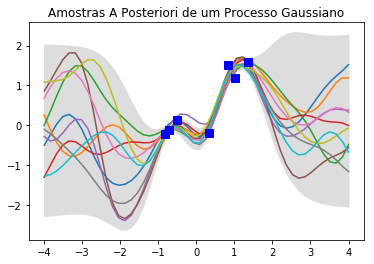

In [14]:
stdv = np.sqrt(np.diagonal(cov))
plt.plot(X_test, f_post)
plt.gca().fill_between(X_test.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.title('Amostras A Posteriori de um Processo Gaussiano')
plt.plot(X_train, y_train, 'bs', ms=8)
plt.show()